In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyvibdmc as dmc
from pyvibdmc.analysis import *
from pyvibdmc.simulation_utilities import *
from pyvibdmc import potential_manager as pm

In [2]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 8})

In [5]:
ps_sim = SimInfo('ch5_bm_dmc_output/ch5_bm_0_sim_info.hdf5')
vref_ps = ps_sim.get_vref()

nn_sim = SimInfo('ch5_nn_dmc_output/ch5_nn_0_sim_info.hdf5')
vref_nn = nn_sim.get_vref()

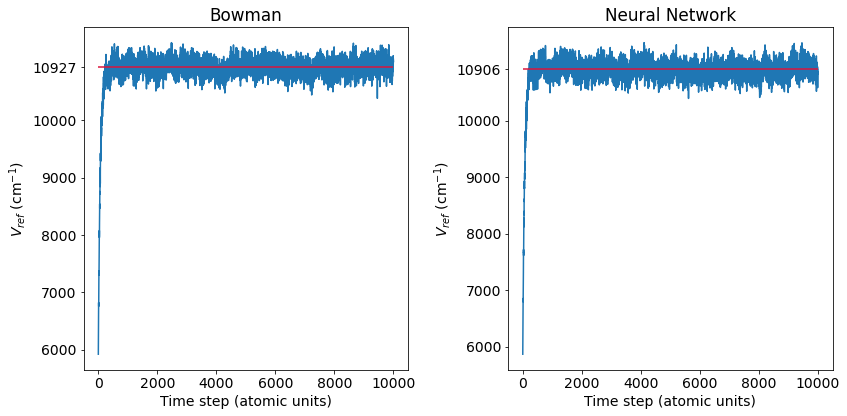

In [60]:
fig = plt.figure(figsize=(12,6))

fig_ps = fig.add_subplot(121)
fig_ps.hlines(y=np.mean(vref_ps[500:,1]), xmin=0, xmax=1e4, color='crimson', zorder=10)
ytick_ps = np.arange(6000,11000,1000)
ytick_ps = np.append(ytick_ps, np.mean(vref_ps[500:,1]))
fig_ps.set_yticks(ytick_ps)
fig_ps.plot(vref_ps[:,0],vref_ps[:,1])
fig_ps.set_xlabel('Time step (atomic units)')
fig_ps.set_ylabel('$V_{ref}$ (cm$^{-1}$)')
fig_ps.title.set_text('Bowman')

fig_nn = fig.add_subplot(122)
fig_nn.hlines(y=np.mean(vref_nn[500:,1]), xmin=0, xmax=1e4, color='crimson', zorder=10)
ytick_nn = np.arange(6000,11000,1000)
ytick_nn = np.append(ytick_nn, np.mean(vref_nn[500:,1]))
fig_nn.set_yticks(ytick_nn)
fig_nn.plot(vref_nn[:,0],vref_nn[:,1])
fig_nn.set_xlabel('Time step (atomic units)')
fig_nn.set_ylabel('$V_{ref}$ (cm$^{-1}$)')
fig_nn.title.set_text('Neural Network')

plt.tight_layout()
plt.show()

In [12]:
v_mean_ps = []
v_mean_nn = []

for i in range(5):
    ps_sim = SimInfo(f'ch5_bm_dmc_output/ch5_bm_{i}_sim_info.hdf5')
    vref_ps = ps_sim.get_vref()
    v_mean_ps.append(np.mean(vref_ps[500:,1]))

    nn_sim = SimInfo(f'ch5_nn_dmc_output/ch5_nn_{i}_sim_info.hdf5')
    vref_nn = nn_sim.get_vref()
    v_mean_nn.append(np.mean(vref_nn[500:,1]))

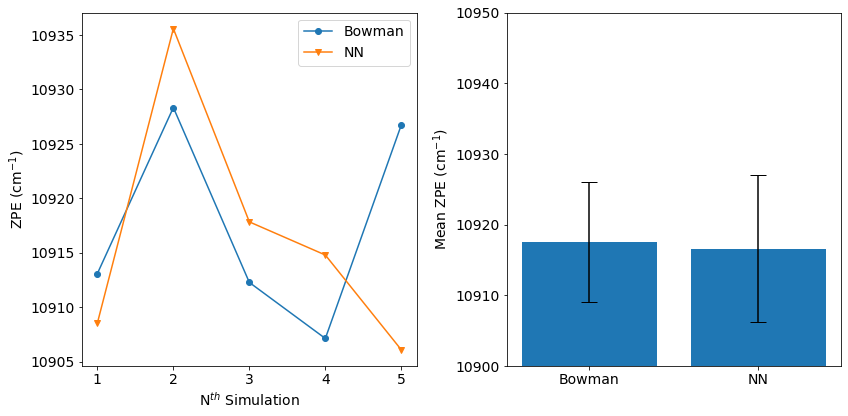

In [15]:
x = np.arange(5)+1
v_mean_ps = np.array(v_mean_ps)
v_mean_nn = np.array(v_mean_nn)

fig = plt.figure(figsize=(12,6))

fig1 = fig.add_subplot(121)
fig1.plot(x, v_mean_ps, marker='o', label='Bowman')
fig1.plot(x, v_mean_nn, marker='v', label='NN')
fig1.set_xlabel('N$^{th}$ Simulation')
fig1.set_ylabel('ZPE (cm$^{-1}$)')
fig1.legend()

fig2 = fig.add_subplot(122)
fig2.bar(['Bowman', 'NN'], [np.mean(v_mean_ps), np.mean(v_mean_nn)], yerr=[np.std(v_mean_ps), np.std(v_mean_nn)])
fig2.set_ylim((10900,10950))
fig2.set_ylabel('Mean ZPE (cm$^{-1}$)')

plt.tight_layout()
plt.show()

In [16]:
print([np.mean(v_mean_ps), np.mean(v_mean_nn)])

[10917.517534775265, 10916.571523889734]


In [17]:
cds_ps = []
dws_ps = []
cds_nn = []
dws_nn = []

for i in range(5):
    ps_sim = SimInfo(f'ch5_bm_dmc_output/ch5_bm_{i}_sim_info.hdf5')
    cds, dws = ps_sim.get_wfns(np.arange(500,10500,1000))
    cds_ps += list(cds)
    dws_ps += list(dws)

    nn_sim = SimInfo(f'ch5_nn_dmc_output/ch5_nn_{i}_sim_info.hdf5')
    cds, dws = nn_sim.get_wfns(np.arange(500,10500,1000))
    cds_nn += list(cds)
    dws_nn += list(dws)


In [38]:
analyzer_ps = AnalyzeWfn(np.array(cds_ps))
analyzer_nn = AnalyzeWfn(np.array(cds_nn))

In [44]:
hch_angle_bm = analyzer_ps.bond_angle(atm1=1,
                                atm_vert=0,
                                atm3=2)
hch_angle_nn = analyzer_nn.bond_angle(atm1=1,
                                atm_vert=0,
                                atm3=2)

In [45]:
hch_angle_bm = np.rad2deg(hch_angle_bm)
hch_angle_nn = np.rad2deg(hch_angle_nn)

In [52]:
hch_histo_bm = analyzer_ps.projection_1d(attr=hch_angle_bm,  # make a 1d histogram , x/y data
                                   desc_weights=np.array(dws_ps),
                                   bin_num=80,
                                   range=(40, 180))
hch_histo_nn = analyzer_nn.projection_1d(attr=hch_angle_nn ,  # make a 1d histogram , x/y data
                                   desc_weights=np.array(dws_nn),
                                   bin_num=80,
                                   range=(40, 180))

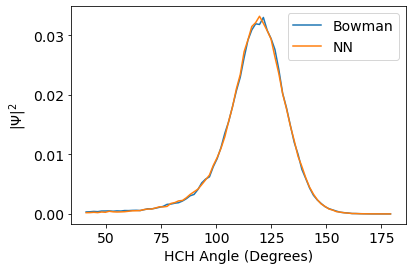

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(hch_histo_bm[:,0], hch_histo_bm[:,1], label='Bowman')
ax.plot(hch_histo_nn[:,0], hch_histo_nn[:,1], label='NN')
ax.set_xlabel('HCH Angle (Degrees)')
ax.set_ylabel('$|\Psi|^2$')
ax.legend()

plt.show()